# Comparison 

compare our method to Moss et al 2018 Nat Com 

## imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import glob

## load moss et al deconvolution

In [2]:
def collapse_data(tissues, df, ind): 
    
    true = np.array(list(range(1, tissues+1)))/np.array(list(range(1, tissues+1))).sum()
    collapse_df = pd.DataFrame(columns={"tissue", "true", "estimate"})
    for i in range(1, ind+1): 
        sample = df.iloc[:, i]
        for r, val in enumerate(sample): 
            collapse_df = collapse_df.append({"tissue":int(r), "true":true[r], "estimate":val}, ignore_index=True)
    return collapse_df

### 10x

In [3]:
df_10 = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input10_deconv_output.csv")
collapse_df_10 = collapse_data(26, df_10, 10)

### 100x

In [4]:
df_100 = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input_deconv_output.csv")
collapse_df_100 = collapse_data(26, df_100, 10)

### 1000x

In [5]:
df_1000 = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input1000_deconv_output.csv")
collapse_df_1000 = collapse_data(26, df_1000, 10)

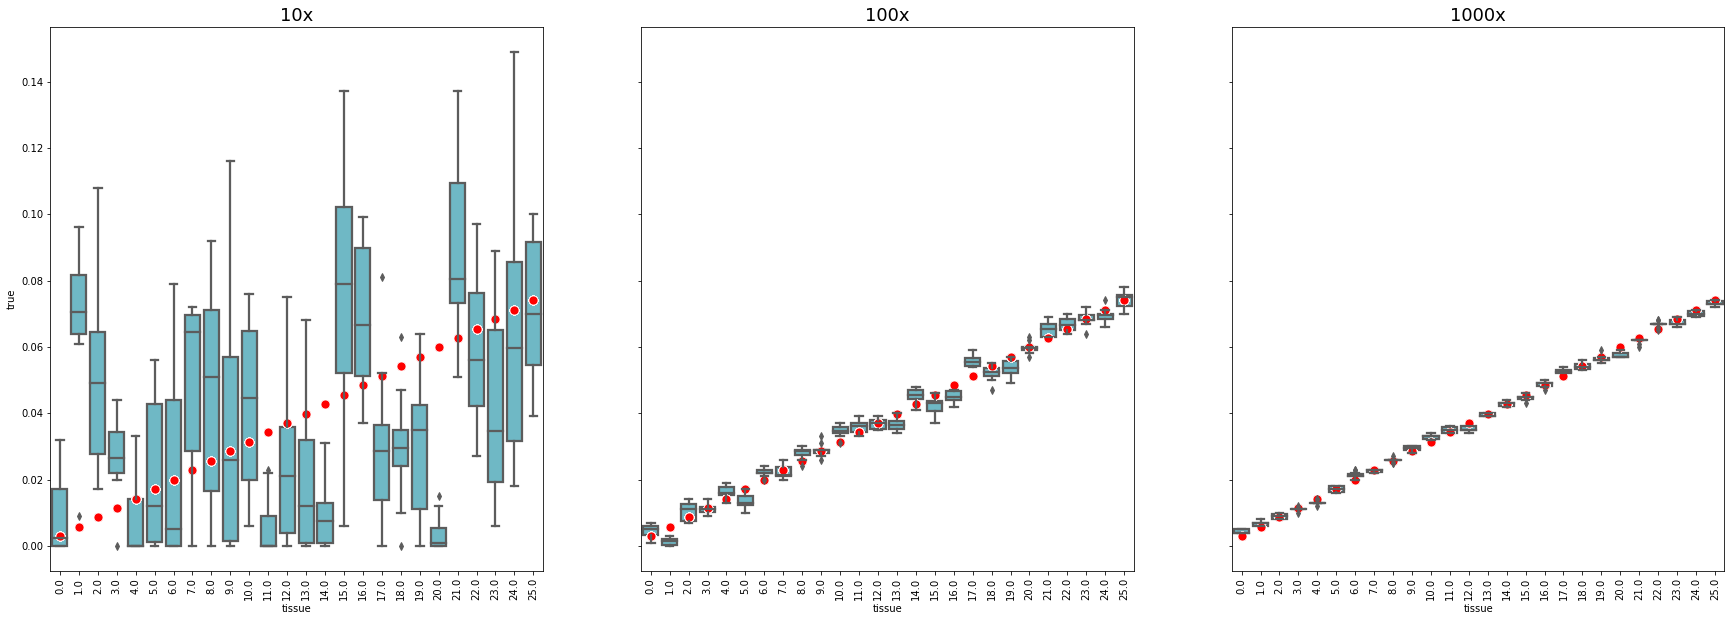

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_10, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "true", data = collapse_df_10, color="red", ax=ax1)

sns.boxplot("tissue", "estimate", data = collapse_df_100, color="#61c2d3", ax=ax2)
sns.scatterplot("tissue", "true", data = collapse_df_100, color="red", ax=ax2)

sns.boxplot("tissue", "estimate", data = collapse_df_1000, color="#61c2d3", ax=ax3)
sns.scatterplot("tissue", "true", data = collapse_df_1000, color="red", ax=ax3)

ax1.set_title("10x")
ax2.set_title("100x")
ax3.set_title("1000x")


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## load our deconvolution data 

In [7]:
def load_pickles(directory, parameter):
    """
    output from EM is a pickle file of estimate and true simulation values 
    load these pickles into dataframe 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")  # estimates from EM 
    df = pd.DataFrame(columns={"estimate", "individual", "truth", "tissue", "iteration"})  # intialize dataframe

    
    for file in range(len(est_files)):  # iterate over all random restarts in the directory 
        
        est_file = est_files[file]  # get all estimates 
        true_file = est_file.replace("est", "true")  # true simulations 
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for individual, pair in enumerate(zip(est, true)): 
            e, t = pair[0], pair[1]
            
            for i in range(len(t)):  # add each estimate for each tissue to dataframe 
                df = df.append({"estimate":e[i], "individual":individual, "truth":t[i], 
                            "tissue":i, "iteration":file}, ignore_index=True)
        
    return df


In [8]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    
    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for t in range(est.shape[0]): 
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"tissue":t, "correlation":corr}, ignore_index=True)
    
    return df

### 10x

In [9]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_10x/"
df_10x = load_pickles(directory, "alpha")

### 10x gamma correlation

In [10]:
gamma_corr_10 = load_gamma_corr(directory, "gamma")

### 100x

In [11]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_100x/"
df_100x = load_pickles(directory, "alpha")

### 1000x

In [12]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_1000x/"
df_1000x = load_pickles(directory, "alpha")

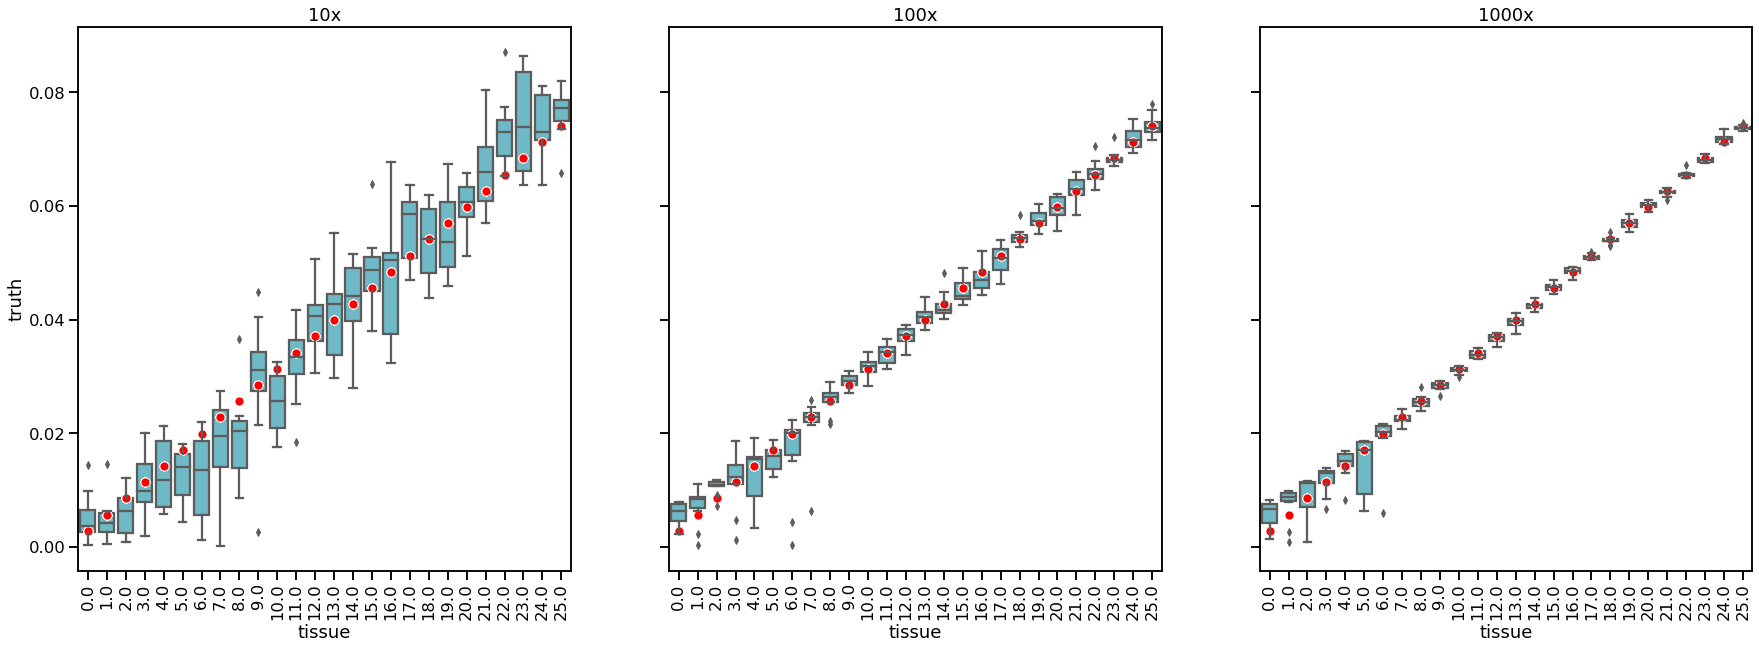

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = df_10x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = df_10x, color="red", ax=ax1)

sns.boxplot("tissue", "estimate", data = df_100x, color="#61c2d3", ax=ax2)
sns.scatterplot("tissue", "truth", data = df_100x, color="red", ax=ax2)

sns.boxplot("tissue", "estimate", data = df_1000x, color="#61c2d3", ax=ax3)
sns.scatterplot("tissue", "truth", data = df_1000x, color="red", ax=ax3)

ax1.set_title("10x")
ax2.set_title("100x")
ax3.set_title("1000x")


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

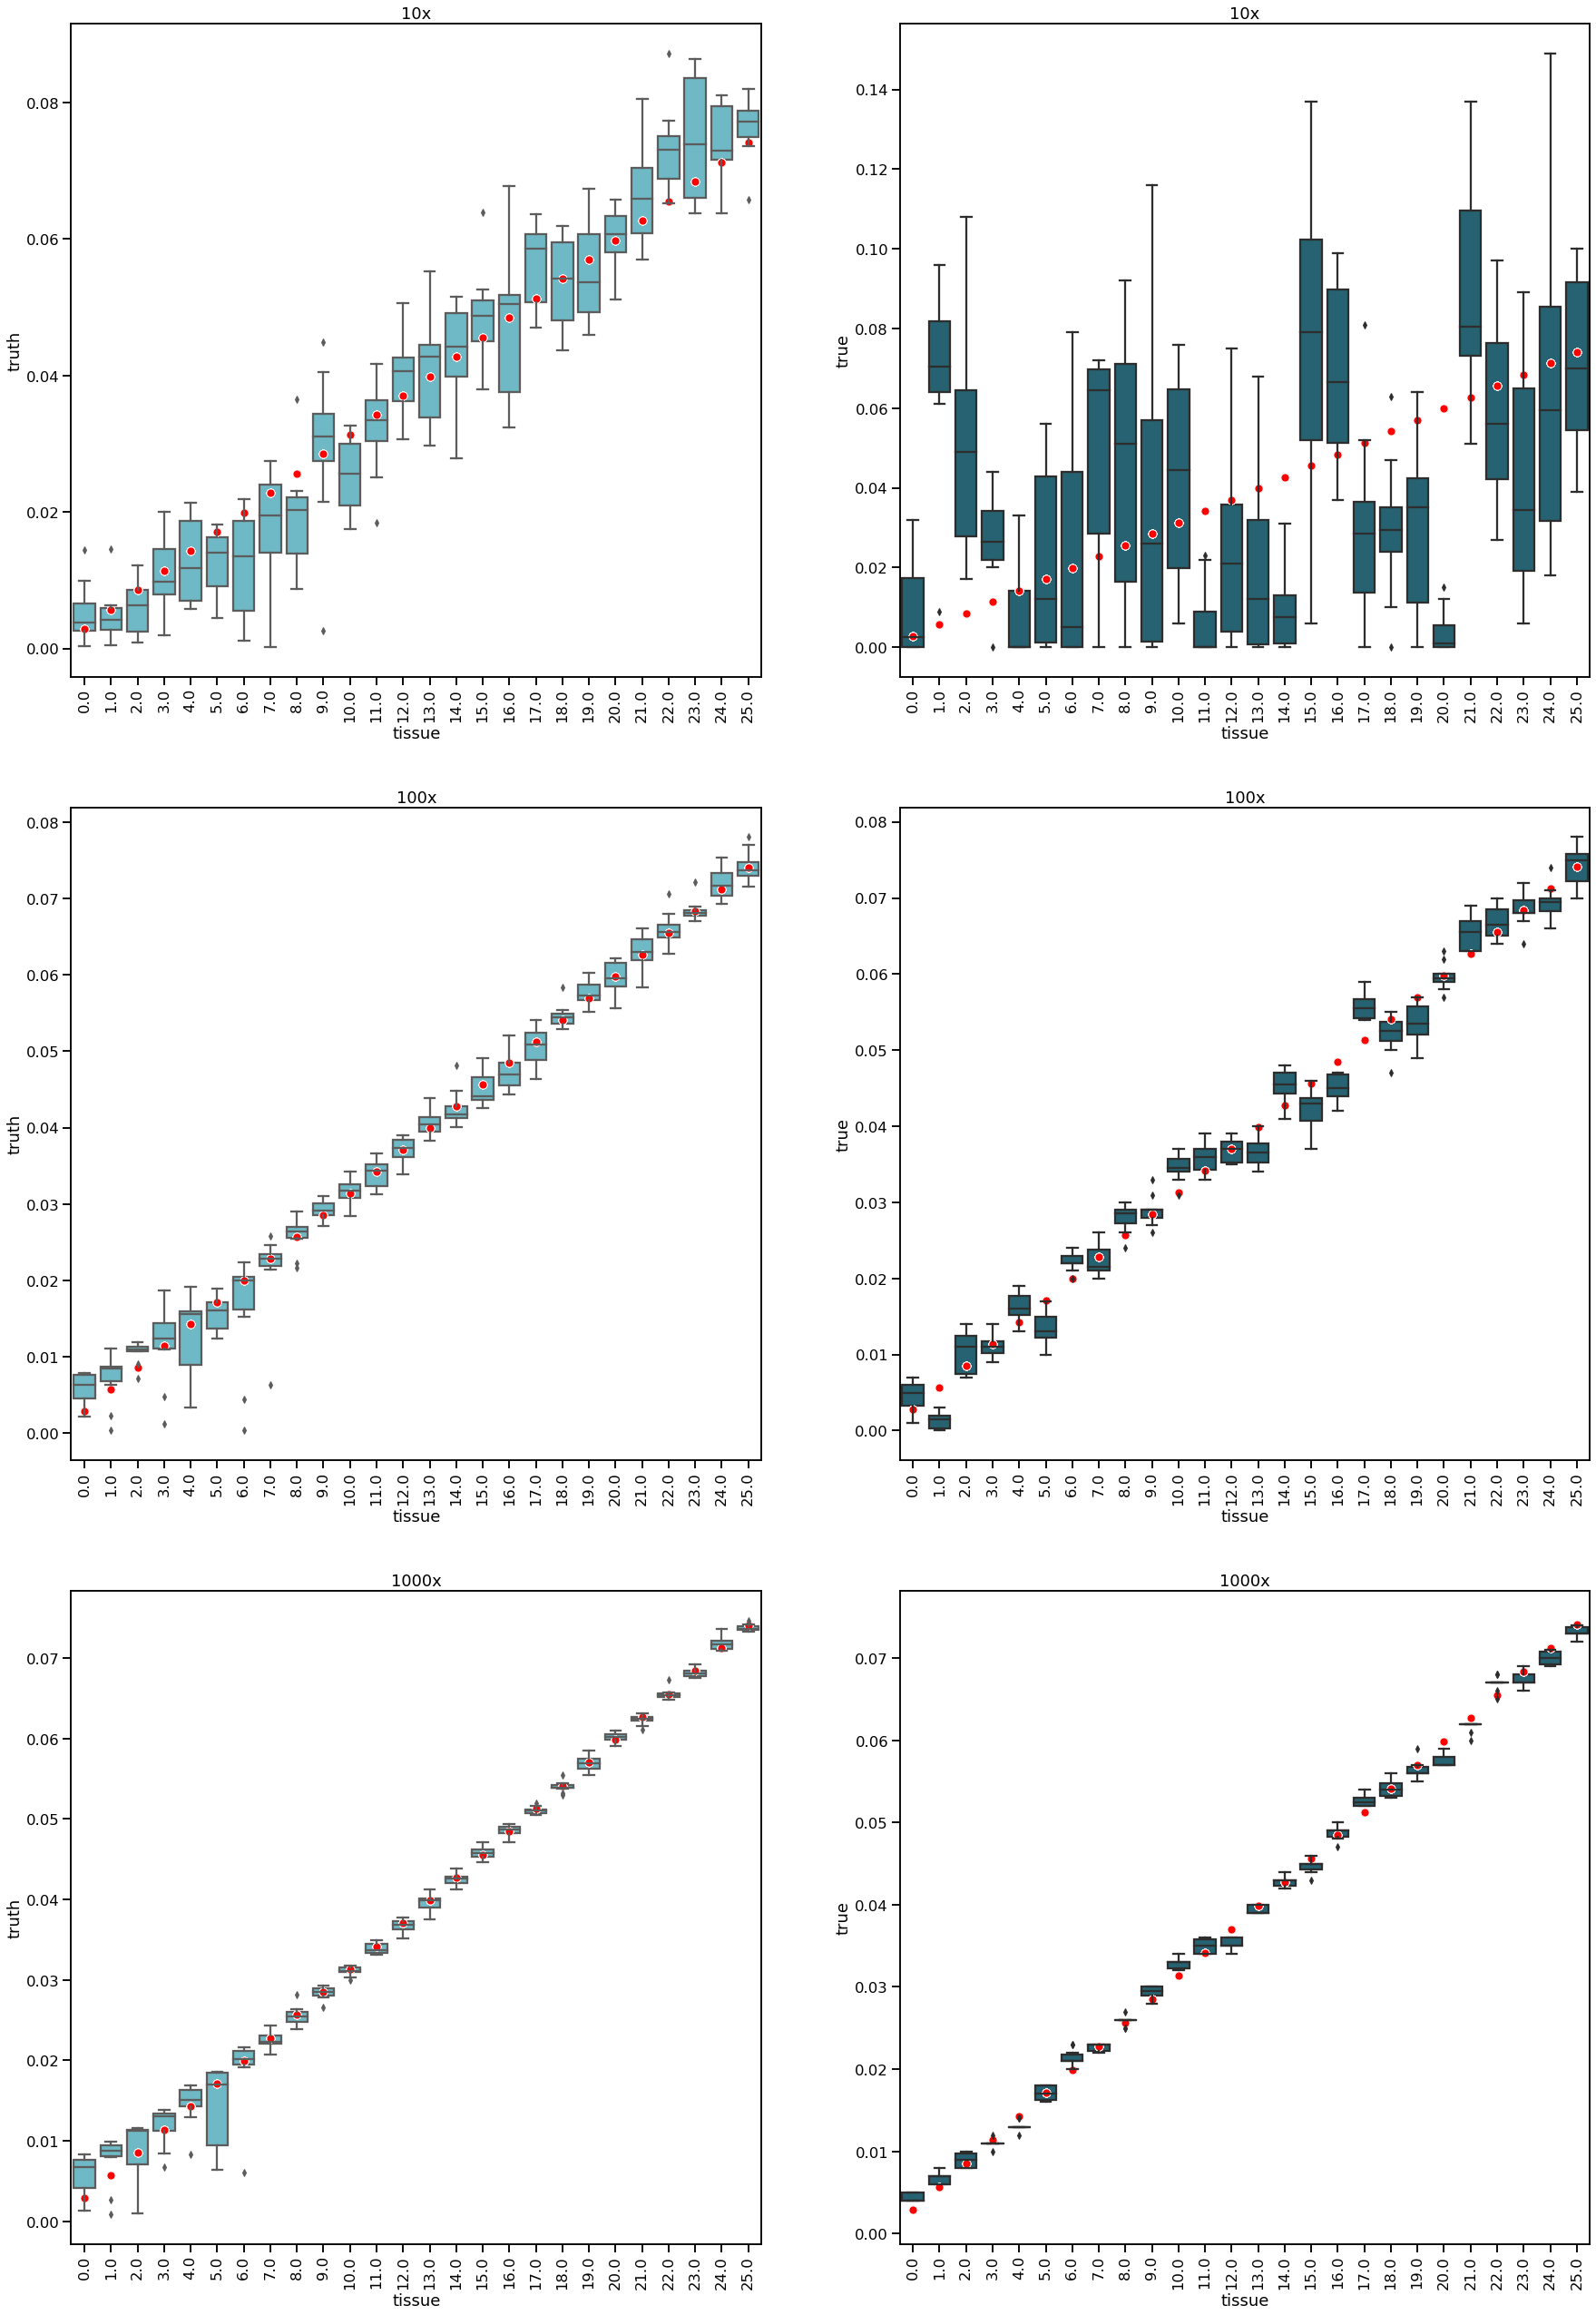

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharey=False, figsize=(30,45))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_10, color="#196a7d", ax=ax[0, 1])
sns.scatterplot("tissue", "true", data = collapse_df_10, color="red", ax=ax[0, 1])

sns.boxplot("tissue", "estimate", data = df_10x, color="#61c2d3", ax=ax[0, 0])
sns.scatterplot("tissue", "truth", data = df_10x, color="red", ax=ax[0, 0])

sns.boxplot("tissue", "estimate", data = collapse_df_100, color="#196a7d", ax=ax[1, 1])
sns.scatterplot("tissue", "true", data = collapse_df_100, color="red", ax=ax[1, 1])

sns.boxplot("tissue", "estimate", data = df_100x, color="#61c2d3", ax=ax[1, 0])
sns.scatterplot("tissue", "truth", data = df_100x, color="red", ax=ax[1, 0])

sns.boxplot("tissue", "estimate", data = collapse_df_1000, color="#196a7d", ax=ax[2, 1])
sns.scatterplot("tissue", "true", data = collapse_df_1000, color="red", ax=ax[2, 1])

sns.boxplot("tissue", "estimate", data = df_1000x, color="#61c2d3", ax=ax[2, 0])
sns.scatterplot("tissue", "truth", data = df_1000x, color="red", ax=ax[2, 0])

ax[0, 0].set_title("10x")
ax[0, 1].set_title("10x")

ax[1, 0].set_title("100x")
ax[1, 1].set_title("100x")

ax[2, 0].set_title("1000x")
ax[2, 1].set_title("1000x")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

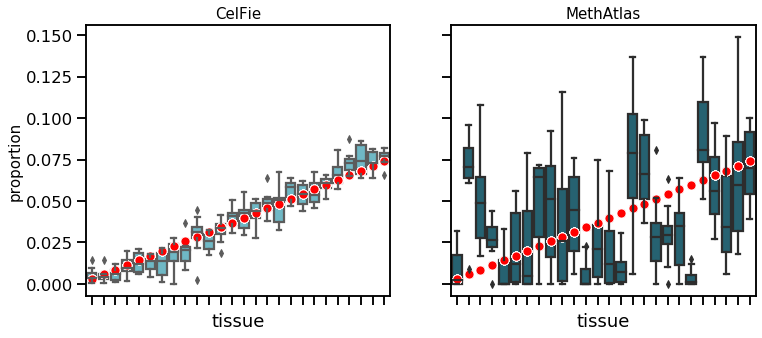

In [16]:
fig, (ax1, ax3) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 5))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_10, color="#196a7d", ax=ax3)
sns.scatterplot("tissue", "true", data = collapse_df_10, color="red", ax=ax3) 

# sns.boxplot("tissue", "correlation", data = gamma_corr_10, color="#61c2d3", ax=ax2)

sns.boxplot("tissue", "estimate", data = df_10x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = df_10x, color="red", ax=ax1)

ax1.set_title("CelFie", fontsize=15)
# ax2.set_title("CelFie β", fontsize=15)
ax3.set_title("MethAtlas", fontsize=15)

ax1.set_ylabel("estimate", fontsize=15)
# ax2.set_ylabel("correlation", fontsize=20)
ax3.set_ylabel("estimate", fontsize=15)

# ax1.set_ylim(0, 0.15)
# ax3.set_ylim(0, 0.15)
# ax2.set_ylim(0, 1)
# ax1.set_xticks(list(range(25)))

ax1.set_ylabel("proportion")
ax1.xaxis.set_major_formatter(plt.NullFormatter())
# ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax3.xaxis.set_major_formatter(plt.NullFormatter())



### calculate correlation as function of depth 

In [17]:
def calculate_correlation(df, num_tissues, true_idx, est_idx, name, correlation): 
    
    for i in range(0, len(df), num_tissues):
        corr = np.corrcoef(df.iloc[i:i+num_tissues, true_idx], df.iloc[i:i+num_tissues, est_idx])[0][1]
        correlation = correlation.append({"depth":name, "correlation":corr}, ignore_index=True)
    return correlation

In [20]:
correlation = pd.DataFrame(columns={"correlation", "depth"})
correlation = calculate_correlation(df_10x, 26, -2, 1, 10, correlation)
correlation = calculate_correlation(df_100x, 26, -2, 1, 100, correlation)
correlation = calculate_correlation(df_1000x, 26, -2, 1, 1000, correlation)

In [21]:
correlation.groupby("depth").mean()

,correlation
depth,
10.0,0.956372
100.0,0.989633
1000.0,0.995113


In [22]:
collapse_df_10.head()

,true,tissue,estimate
0,0.002849,0.0,0.000
1,0.005698,1.0,0.078
2,0.008547,2.0,0.057
3,0.011396,3.0,0.036
4,0.014245,4.0,0.000


In [23]:
moss_correlation = pd.DataFrame(columns={"correlation", "depth"})
moss_correlation = calculate_correlation(collapse_df_10, 26, 0,  -1, 10, moss_correlation)
moss_correlation = calculate_correlation(collapse_df_100, 26, 0, -1, 100, moss_correlation)
moss_correlation = calculate_correlation(collapse_df_1000, 26, 0, -1, 1000, moss_correlation)

In [24]:
moss_correlation.groupby("depth").mean()

,correlation
depth,
10.0,0.222179
100.0,0.989320
1000.0,0.998380


### lineplot

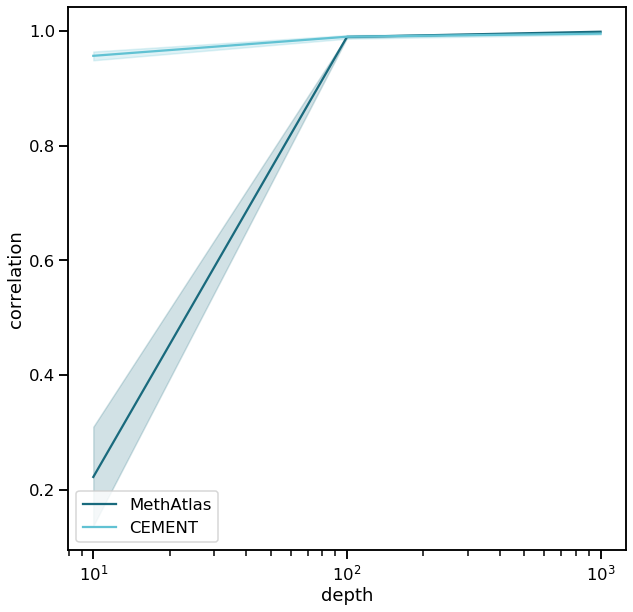

In [25]:
sns.set_context("talk")
plt.figure(figsize=(10, 10))
sns.lineplot("depth", "correlation", data = moss_correlation, color="#196a7d", label="MethAtlas")
sns.lineplot("depth", "correlation", data = correlation, color="#61c2d3", label="CEMENT")

plt.xscale("log")


In [26]:
moss_correlation["name"] = "MethAtlas"
correlation["name"] = "CelFiE"
corr_concat = pd.concat([correlation, moss_correlation])

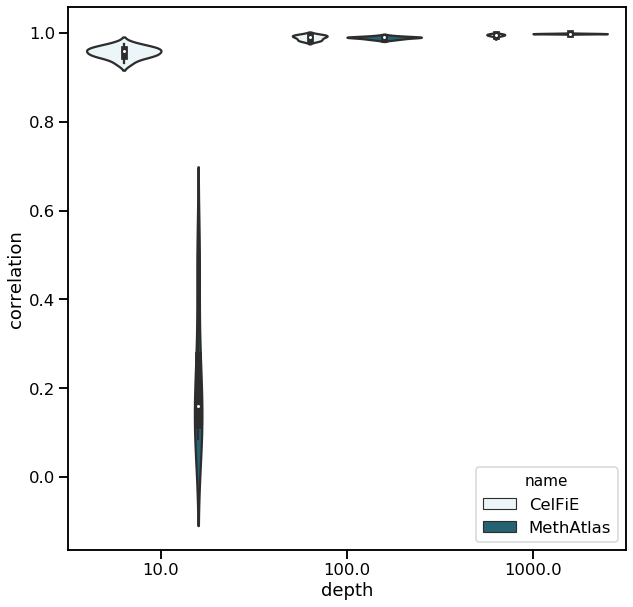

In [27]:
sns.set_context("talk")
plt.figure(figsize=(10, 10))
sns.violinplot("depth", "correlation", data = corr_concat, hue="name", color="#196a7d")


## with missing 1 missing tissue 

## our method

### 10x 

In [40]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_10x_1qunk/"
df_10x_unk = load_pickles(directory, "alpha")

### 100x

In [41]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_100x_1unk/"
df_100x_unk = load_pickles(directory, "alpha")

### 1000x 

In [42]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_1000x_1unk/"
df_1000x_unk = load_pickles(directory, "alpha")

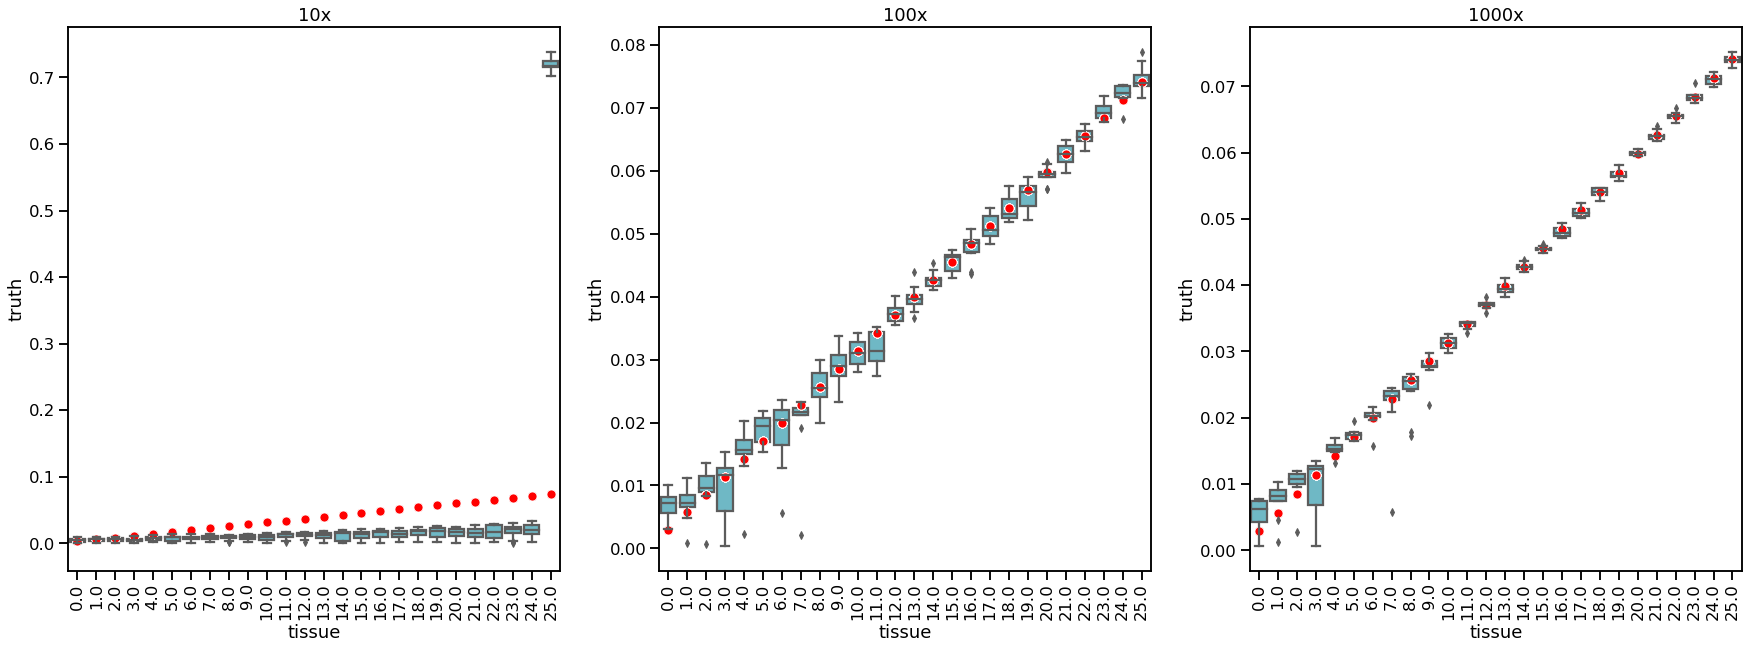

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(30,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = df_10x_unk, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = df_10x_unk, color="red", ax=ax1)

sns.boxplot("tissue", "estimate", data = df_100x_unk, color="#61c2d3", ax=ax2)
sns.scatterplot("tissue", "truth", data = df_100x_unk, color="red", ax=ax2)

sns.boxplot("tissue", "estimate", data = df_1000x_unk, color="#61c2d3", ax=ax3)
sns.scatterplot("tissue", "truth", data = df_1000x_unk, color="red", ax=ax3)

ax1.set_title("10x")
ax2.set_title("100x")
ax3.set_title("1000x")


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## moss method

In [44]:
def collapse_data(tissues, df, ind): 
    
    true = np.array(list(range(1, tissues+1)))/np.array(list(range(1, tissues+1))).sum()
    collapse_df = pd.DataFrame(columns={"tissue", "true", "estimate"})
    for i in range(1, ind+1): 
        sample = df.iloc[:, i]

        for r, val in enumerate(sample): 
            collapse_df = collapse_df.append({"tissue":int(r), "true":true[r], "estimate":val}, ignore_index=True)
        
        collapse_df = collapse_df.append({"tissue":int(r+1), "true":true[r+1], "estimate":0}, ignore_index=True)

    return collapse_df

### 10x 

In [45]:
df_10_unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input10_unk_deconv_output.csv")
collapse_df_10_unk = collapse_data(26, df_10_unk, 10)

### 100x

In [46]:
df_100_unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input100_unk_deconv_output.csv")
collapse_df_100_unk = collapse_data(26, df_100_unk, 10)

### 1000x

In [47]:
df_1000_unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input1000_unk_deconv_output.csv")
collapse_df_1000_unk = collapse_data(26, df_100_unk, 10)

### plot

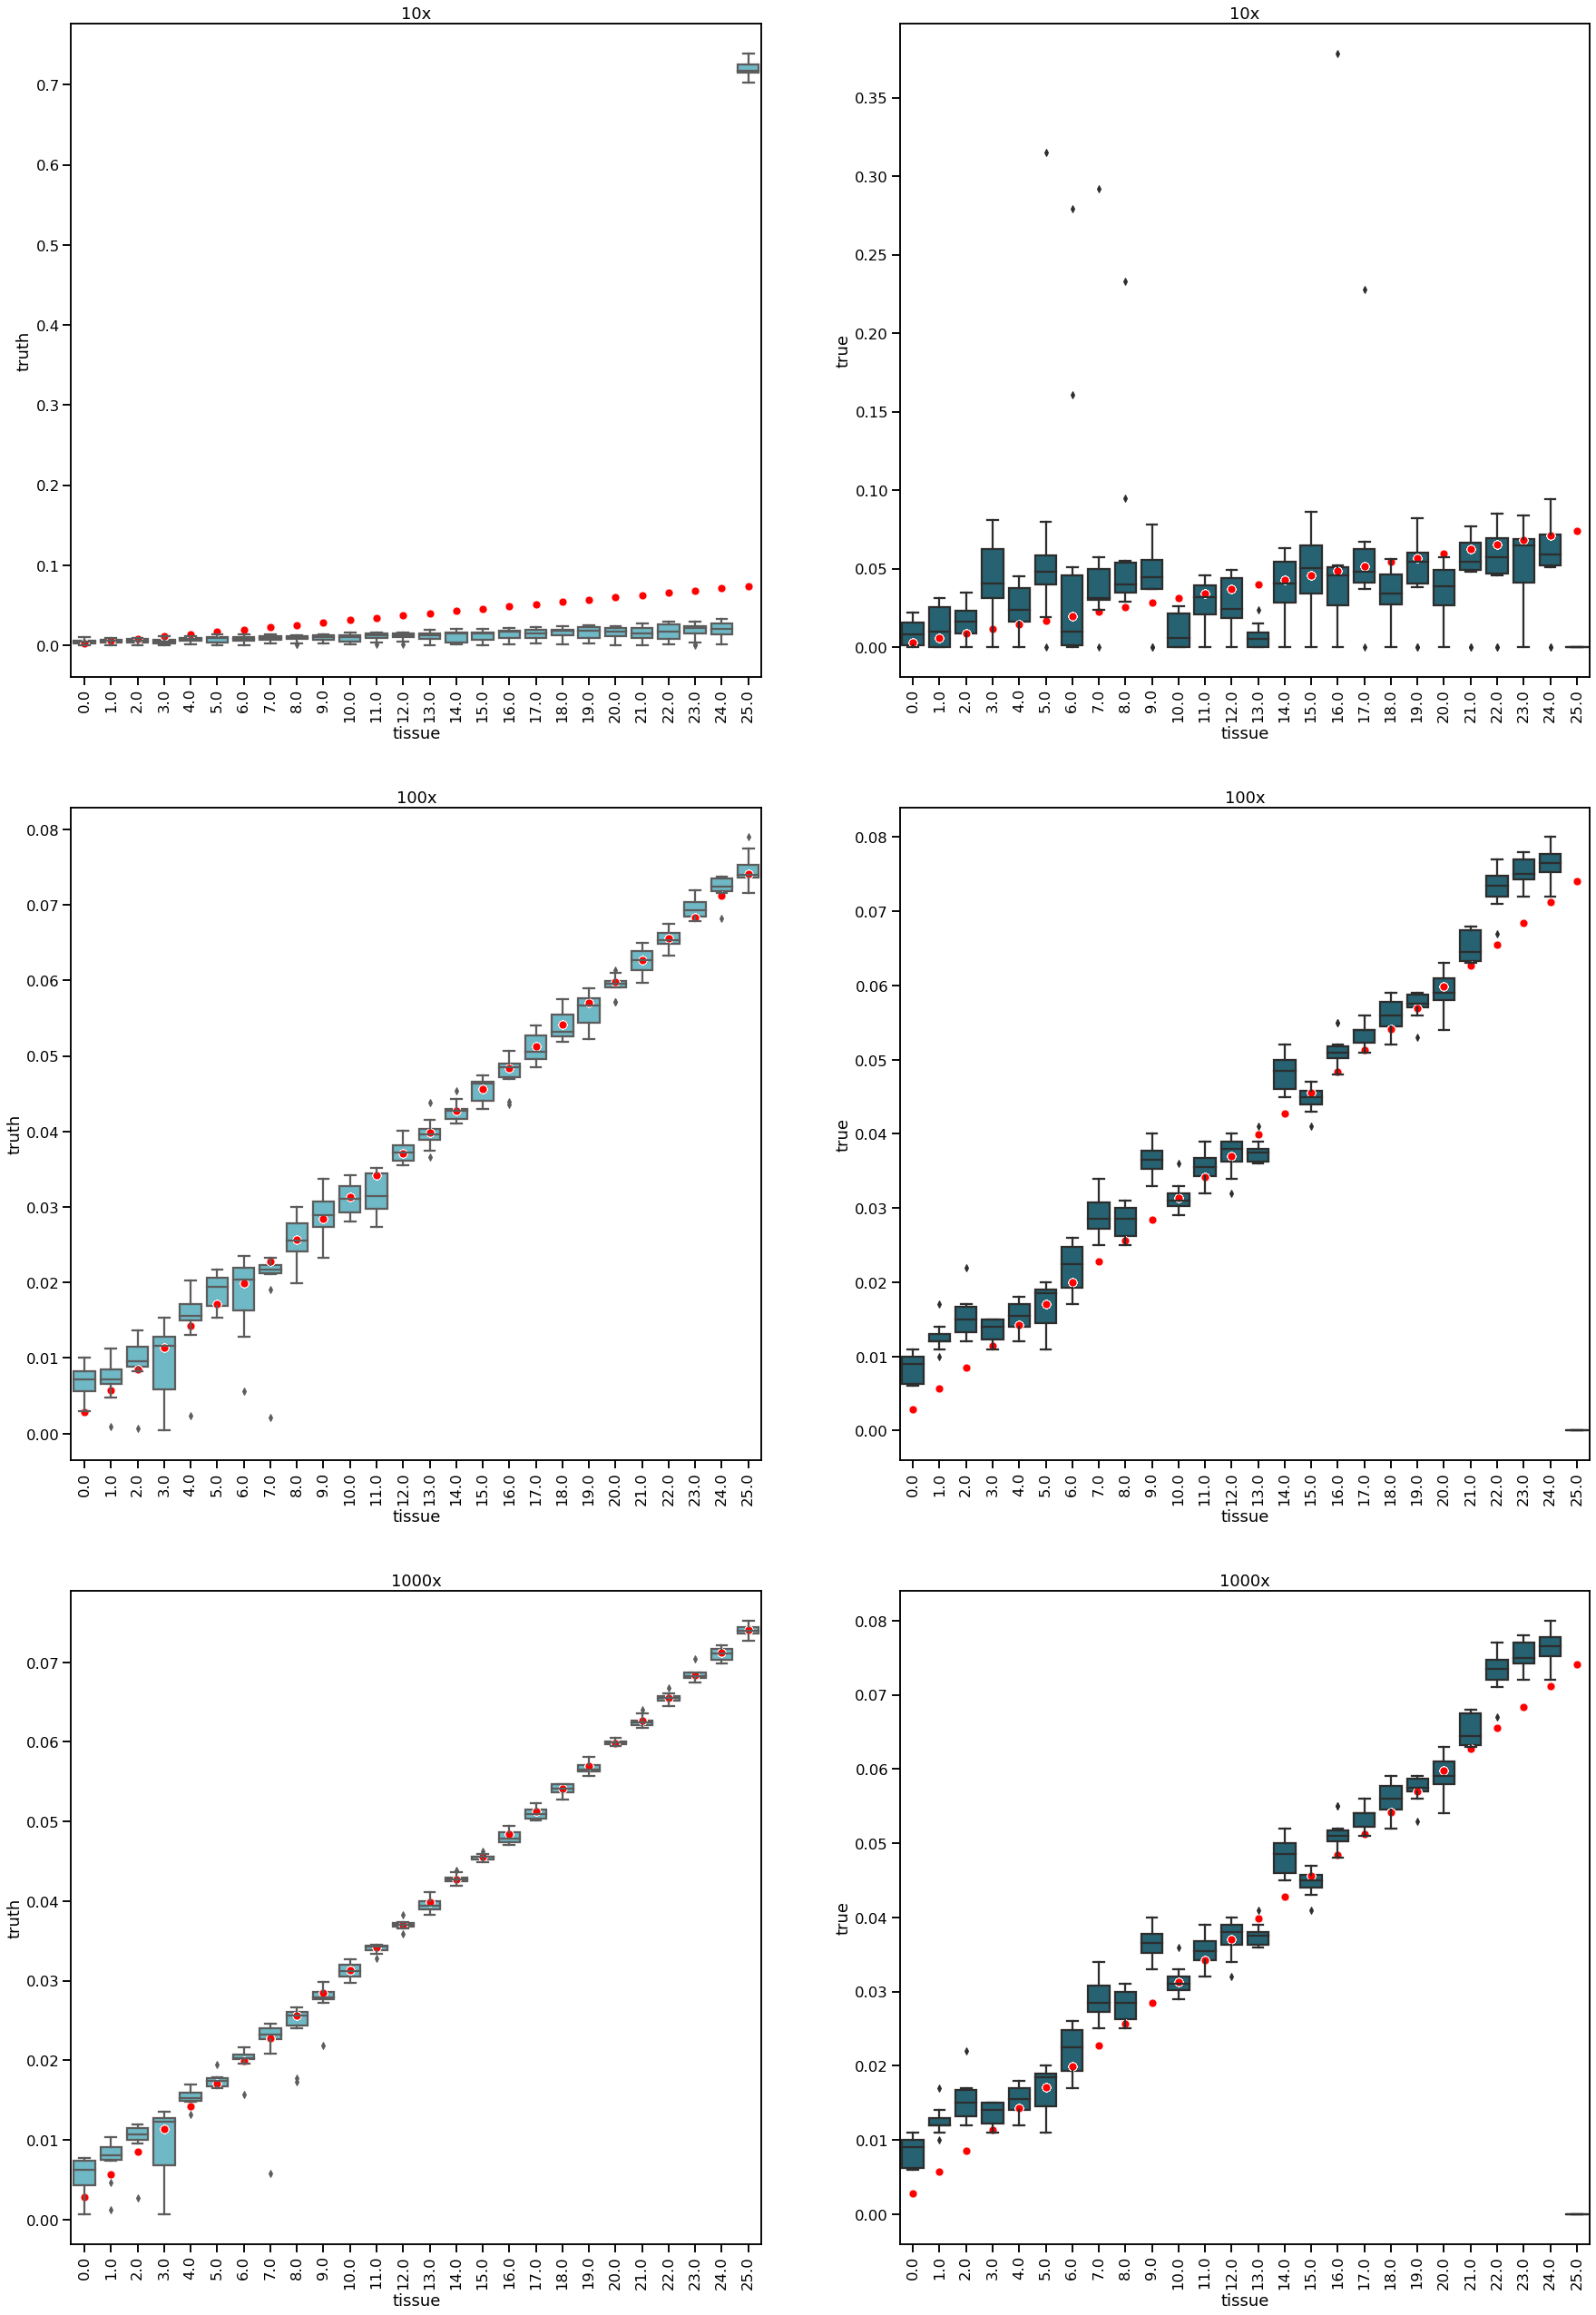

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharey=False, figsize=(30,45))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_10_unk, color="#196a7d", ax=ax[0, 1])
sns.scatterplot("tissue", "true", data = collapse_df_10_unk, color="red", ax=ax[0, 1])

sns.boxplot("tissue", "estimate", data = df_10x_unk, color="#61c2d3", ax=ax[0, 0])
sns.scatterplot("tissue", "truth", data = df_10x_unk, color="red", ax=ax[0, 0])

sns.boxplot("tissue", "estimate", data = collapse_df_100_unk, color="#196a7d", ax=ax[1, 1])
sns.scatterplot("tissue", "true", data = collapse_df_100_unk, color="red", ax=ax[1, 1])

sns.boxplot("tissue", "estimate", data = df_100x_unk, color="#61c2d3", ax=ax[1, 0])
sns.scatterplot("tissue", "truth", data = df_100x_unk, color="red", ax=ax[1, 0])

sns.boxplot("tissue", "estimate", data = collapse_df_1000_unk, color="#196a7d", ax=ax[2, 1])
sns.scatterplot("tissue", "true", data = collapse_df_1000_unk, color="red", ax=ax[2, 1])

sns.boxplot("tissue", "estimate", data = df_1000x_unk, color="#61c2d3", ax=ax[2, 0])
sns.scatterplot("tissue", "truth", data = df_1000x_unk, color="red", ax=ax[2, 0])

ax[0, 0].set_title("10x")
ax[0, 1].set_title("10x")

ax[1, 0].set_title("100x")
ax[1, 1].set_title("100x")

ax[2, 0].set_title("1000x")
ax[2, 1].set_title("1000x")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
fig, (ax1, ax3) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 5))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_100_unk, color="#196a7d", ax=ax3)
sns.scatterplot("tissue", "true", data = collapse_df_100_unk, color="red", ax=ax3) 

# sns.boxplot("tissue", "correlation", data = gamma_corr_10, color="#61c2d3", ax=ax2)

sns.boxplot("tissue", "estimate", data = df_100x_unk, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = df_100x_unk, color="red", ax=ax1)

ax1.set_title("CelFie", fontsize=15)
# ax2.set_title("CelFie β", fontsize=15)
ax3.set_title("MethAtlas", fontsize=15)

ax1.set_ylabel("estimate", fontsize=15)
# ax2.set_ylabel("correlation", fontsize=20)
ax3.set_ylabel("estimate", fontsize=15)

# ax1.set_ylim(0, 0.15)
# ax3.set_ylim(0, 0.15)
# ax2.set_ylim(0, 1)
# ax1.set_xticks(list(range(25)))

ax1.xaxis.set_major_formatter(plt.NullFormatter())
# ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax3.xaxis.set_major_formatter(plt.NullFormatter())



### calculate correlation 

In [50]:
correlation_unk = pd.DataFrame(columns={"correlation", "depth"})
correlation_unk = calculate_correlation(df_10x_unk, 26, -2, 1, 10, correlation_unk)
correlation_unk = calculate_correlation(df_100x_unk, 26, -2, 1, 100, correlation_unk)
correlation_unk = calculate_correlation(df_1000x_unk, 26, -2, 1, 1000, correlation_unk)

In [51]:
correlation_unk.groupby("depth").mean()

,correlation
depth,
10.0,0.361692
100.0,0.989541
1000.0,0.995176


In [53]:
moss_correlation_unk = pd.DataFrame(columns={"correlation", "depth"})
moss_correlation_unk = calculate_correlation(collapse_df_10_unk, 26, -1, 1, 10, moss_correlation_unk)
moss_correlation_unk = calculate_correlation(collapse_df_100_unk, 26, -1, 1, 100, moss_correlation_unk)
moss_correlation_unk = calculate_correlation(collapse_df_1000_unk, 26, -1, 1, 1000, moss_correlation_unk)

In [54]:
moss_correlation_unk.groupby("depth").mean()

,correlation
depth,
10.0,0.275266
100.0,0.749056
1000.0,0.749056


### plot

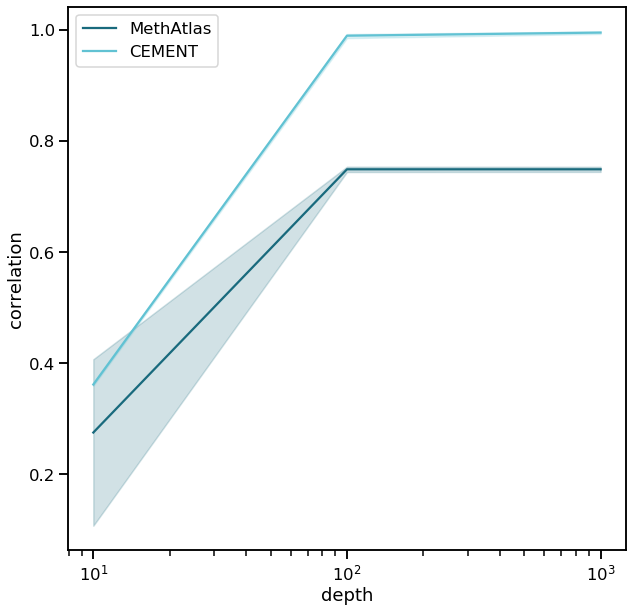

In [55]:
sns.set_context("talk")
plt.figure(figsize=(10, 10))
sns.lineplot("depth", "correlation", data = moss_correlation_unk, color="#196a7d", label="MethAtlas")
sns.lineplot("depth", "correlation", data = correlation_unk, color="#61c2d3", label="CEMENT")

plt.xscale("log")


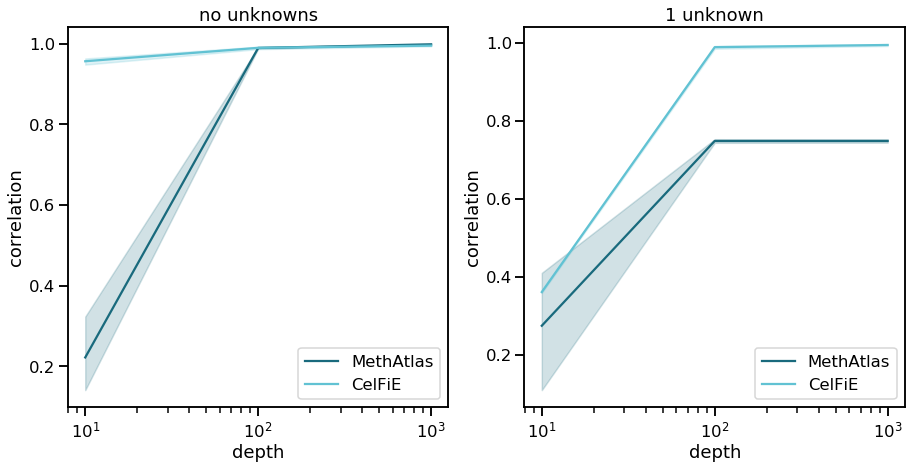

In [59]:
sns.set_context("talk")
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))

sns.lineplot("depth", "correlation", data = moss_correlation, color="#196a7d", label="MethAtlas", ax=ax1)
sns.lineplot("depth", "correlation", data = correlation, color="#61c2d3", label="CelFiE", ax=ax1)

sns.lineplot("depth", "correlation", data = moss_correlation_unk, color="#196a7d", label="MethAtlas", ax=ax2)
sns.lineplot("depth", "correlation", data = correlation_unk, color="#61c2d3", label="CelFiE", ax=ax2)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_title("no unknowns")
ax2.set_title("1 unknown")
ax2.legend(loc='lower right')



## with two missing tissues 

### moss et al 

In [ ]:
def collapse_data(tissues, df, ind): 
    
    true = np.array(list(range(1, tissues+1)))/np.array(list(range(1, tissues+1))).sum()
    collapse_df = pd.DataFrame(columns={"tissue", "true", "estimate"})
    for i in range(1, ind+1): 
        sample = df.iloc[:, i]

        for r, val in enumerate(sample): 
            collapse_df = collapse_df.append({"tissue":int(r), "true":true[r], "estimate":val}, ignore_index=True)
        
        collapse_df = collapse_df.append({"tissue":int(r+1), "true":true[r+1], "estimate":0}, ignore_index=True)
        collapse_df = collapse_df.append({"tissue":int(r+2), "true":true[r+2], "estimate":0}, ignore_index=True)

    return collapse_df

### 10x

In [ ]:
df_10_2unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input10_2unk_deconv_output.csv")
collapse_df_10_2unk = collapse_data(26, df_10_2unk, 10)

### 100x

In [ ]:
df_100_2unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input100_2unk_deconv_output.csv")
collapse_df_100_2unk = collapse_data(26, df_100_2unk, 10)

### 1000x 

In [ ]:
df_1000_2unk = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simulated_input1000_2unk_deconv_output.csv")
collapse_df_1000_2unk = collapse_data(26, df_1000_2unk, 10)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = collapse_df_10_2unk, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "true", data = collapse_df_10_2unk, color="red", ax=ax1)

sns.boxplot("tissue", "estimate", data = collapse_df_100_2unk, color="#61c2d3", ax=ax2)
sns.scatterplot("tissue", "true", data = collapse_df_100_2unk, color="red", ax=ax2)

sns.boxplot("tissue", "estimate", data = collapse_df_1000_2unk, color="#61c2d3", ax=ax3)
sns.scatterplot("tissue", "true", data = collapse_df_1000_2unk, color="red", ax=ax3)

ax1.set_title("10x")
ax2.set_title("100x")
ax3.set_title("1000x")
vamp

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## our method

### 10x

In [ ]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_10x_2unk/"
df_10x_2unk = load_pickles(directory, "alpha")

### 100x

In [ ]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_100x_2unk/"
df_100x_2unk = load_pickles(directory, "alpha")

### 1000x

In [ ]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/moss_sim_1000x_2unk/"
df_1000x_2unk = load_pickles(directory, "alpha")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(30,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = df_10x_2unk, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = df_10x_2unk, color="red", ax=ax1)

sns.boxplot("tissue", "estimate", data = df_100x_2unk, color="#61c2d3", ax=ax2)
sns.scatterplot("tissue", "truth", data = df_100x_2unk, color="red", ax=ax2)

sns.boxplot("tissue", "estimate", data = df_1000x_2unk, color="#61c2d3", ax=ax3)
sns.scatterplot("tissue", "truth", data = df_1000x_2unk, color="red", ax=ax3)

ax1.set_title("10x")
ax2.set_title("100x")
ax3.set_title("1000x")


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)